# Tokyo Airbnb Price and Review Prediction and Data Analysis

In [1]:
import numpy as np

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.feature_selection import RFE,RFECV

In [2]:
data = pd.read_csv('dataset.csv') # memuat file csv sebagai data frame

D:\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (50,51,52,53,54,55,56,57,58,62,63,64,66,69,70,78,79,81,82,83,84,85) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
data.head(100)

,id,host_id,host_name,host_response_time,host_response_rate,host_acceptance_rate,host_neighbourhood,host_listings_count,host_total_listings_count,neighbourhood,...,Unnamed: 81,Unnamed: 82,Unnamed: 83,Unnamed: 84,Unnamed: 85,Unnamed: 86,Unnamed: 87,Unnamed: 88,Unnamed: 89,Unnamed: 90
0,35303,151977,Miyuki,NaN,NaN,NaN,Shibuya District,3,3,Shibuya District,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,197677,964081,Yoshimi & Marek,within a few hours,100%,88%,Sumida District,1,1,Sumida District,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,289597,341577,Hide&Kei,within a few hours,100%,82%,Nerima District,2,2,Nerima District,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,370759,1573631,"Gilles,Mayumi,Taiki",within a day,100%,93%,Setagaya District,3,3,Setagaya District,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,700253,341577,Hide&Kei,within a few hours,100%,82%,Nerima District,2,2,Nerima District,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,4396219,18776800,LiveinAsia,within a few hours,100%,99%,Shibuya District,18,18,Suginami District,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
96,4396221,18776800,LiveinAsia,within a few hours,100%,99%,Shibuya District,18,18,Suginami District,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
97,4471640,22643572,Sachiko&Kurara,within a few hours,100%,93%,NaN,3,3,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
98,4471946,23202702,Teruko,within an hour,100%,98%,Kita District,1,1,Kita District,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
data.info( ) #informasi dataset


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13049 entries, 0 to 13048
Data columns (total 91 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         13049 non-null  int64  
 1   host_id                    12811 non-null  object 
 2   host_name                  13003 non-null  object 
 3   host_response_time         12199 non-null  object 
 4   host_response_rate         12246 non-null  object 
 5   host_acceptance_rate       12729 non-null  object 
 6   host_neighbourhood         11234 non-null  object 
 7   host_listings_count        12996 non-null  object 
 8   host_total_listings_count  13028 non-null  object 
 9   neighbourhood              11861 non-null  object 
 10  neighbourhood_cleansed     13019 non-null  object 
 11  property_type              13048 non-null  object 
 12  room_type                  13045 non-null  object 
 13  accommodates               13046 non-null  obj

In [5]:
data.describe() 

,id,Unnamed: 44,Unnamed: 59,Unnamed: 65,Unnamed: 67,Unnamed: 68,Unnamed: 71,Unnamed: 72,Unnamed: 73,Unnamed: 74,Unnamed: 75,Unnamed: 76,Unnamed: 77,Unnamed: 80,Unnamed: 86,Unnamed: 87,Unnamed: 88,Unnamed: 89,Unnamed: 90
count,1.304900e+04,5.000000,6.000000,6.000000,6.000000,6.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,5.0,5.0,5.0,5.0,1.00
mean,3.119821e+07,12.080000,390.333333,0.500000,0.166667,0.166667,80.0,6.0,10.0,8.0,6.0,8.0,6.0,NaN,5.0,0.0,5.0,0.0,0.65
std,9.484635e+06,17.509449,569.173670,1.224745,0.408248,0.408248,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN
min,3.530300e+04,0.440000,2.000000,0.000000,0.000000,0.000000,80.0,6.0,10.0,8.0,6.0,8.0,6.0,NaN,5.0,0.0,5.0,0.0,0.65
25%,2.593419e+07,2.960000,30.000000,0.000000,0.000000,0.000000,80.0,6.0,10.0,8.0,6.0,8.0,6.0,NaN,5.0,0.0,5.0,0.0,0.65
50%,3.284523e+07,7.000000,30.000000,0.000000,0.000000,0.000000,80.0,6.0,10.0,8.0,6.0,8.0,6.0,NaN,5.0,0.0,5.0,0.0,0.65
75%,3.926178e+07,7.000000,851.250000,0.000000,0.000000,0.000000,80.0,6.0,10.0,8.0,6.0,8.0,6.0,NaN,5.0,0.0,5.0,0.0,0.65
max,4.328692e+07,43.000000,1125.000000,3.000000,1.000000,1.000000,80.0,6.0,10.0,8.0,6.0,8.0,6.0,NaN,5.0,0.0,5.0,0.0,0.65


In [6]:
 #ukuran awal nya (13049, 91)
data.shape

(13049, 91)

In [7]:
#delete data unamed
data.drop(data.columns[data.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)


In [8]:
#drop fitur yang tidak dibutuhkan
data.drop(['id', 'host_id', 'host_name','host_neighbourhood','neighbourhood','neighbourhood_cleansed','guests_included','extra_people','minimum_minimum_nights','maximum_minimum_nights','minimum_maximum_nights','maximum_maximum_nights','number_of_reviews','number_of_reviews_ltm','host_listings_count','host_total_listings_count'], axis=1,inplace = True)

12 fitur yg saya pilih :

host_response_time
host_response_rate
host_acceptance_rate
property_type
room_type
accommodates
bathrooms
bedrooms
beds
minimum_nights
maximum_nights
reviews_per_month


review_scores_rating (target)
price (target)



In [9]:
data.head(100)

,host_response_time,host_response_rate,host_acceptance_rate,property_type,room_type,accommodates,bathrooms,bedrooms,beds,price,minimum_nights,maximum_nights,review_scores_rating,reviews_per_month
0,NaN,NaN,NaN,Apartment,Private room,1,1,1,1,"$4,183.00",28,1125,94,0.18
1,within a few hours,100%,88%,Apartment,Entire home/apt,2,1,1,2,"$11,048.00",3,365,95,1.57
2,within a few hours,100%,82%,Apartment,Entire home/apt,2,1,1,1,"$4,171.00",28,180,95,1.18
3,within a day,100%,93%,Apartment,Entire home/apt,2,1,0,1,"$6,952.00",28,720,95,1.39
4,within a few hours,100%,82%,Apartment,Entire home/apt,2,1,1,1,"$3,957.00",28,180,96,1.12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,within a few hours,100%,99%,Apartment,Entire home/apt,5,1,1,2,"$13,477.00",6,1125,95,0.41
96,within a few hours,100%,99%,Apartment,Entire home/apt,4,1,1,1,"$17,006.00",6,1125,91,0.36
97,within a few hours,100%,93%,House,Private room,2,1.5,1,4,"$3,744.00",4,1125,100,0.2
98,within an hour,100%,98%,Apartment,Entire home/apt,5,1,2,5,"$15,017.00",7,365,99,1.53


Pada percobaan dibawah ini saya mencoba untuk membersihkan data kotor dengan cara replace salah 1 fitur yaitu host_response_time tapi saat saya coba ternyata data kotornya terlalu banyak sehingga saya tidak jadi mereplace data kotor tersebut, Lalu saya mengdrop semua data yg kosong/nan agar lebih mudah saja. Lalu saya memakai concat untuk merapikan indeks yang tidak urut karena sebelumnya saya telah mengdrop beberapa data

In [10]:
#buat penampung
temp = []
temp = pd.DataFrame(temp)


In [11]:
#data["host_response_time"].fillna("N/A", inplace = True) 
#data["host_response_time"].dropna(inplace = True)

#saya Mendrop semua tabel data Nan biar mudah
data.dropna(inplace = True)
data = pd.concat([data, temp], ignore_index=True)
#concat untuk memperbaiki index, kalau tidak memakai ini maka akan terjadi error karena indexnya berantakan setelah didrop

data.head()
#data["host_response_time"].fillna("N/A", inplace = True)  
#data["host_response_time"].fillna("N/A", inplace = True)  
#data.fillna("N/A", inplace = True)
#data.replace(to_replace="Hello! We are Khaosan Tokyo Laboratory, a cozy hostel in Asakusa:)\nThank you for stopping by.\n\nWe are located at Asakusa, easy access from any stations there.\n\n･5 minutes walk from “Exit 3” of Tawaramachi station on Ginza line (ﾒﾄﾛ銀座線田原町駅)\n･13 minutes walk from “Exit A4” of Asakusa station on Toei Asakusa line (都営浅草線浅草駅)\n･5 minutes walk from “Exit 4” of Asakusa station on Tsukuba Express (つくばｴｸｽﾌﾟﾚｽ浅草駅).\n\n･1,290Yen / 80min from Narita Airport (成田空港)\n･620Yen / 45min from Haneda Airport (羽田空港)\n\nAsakusa is perfect for travelling Tokyo. Of course it is walking-distance to go to Sensoji Temple (浅草寺/せんそうじ) and Kaminarimon (雷門/かみなりもん).\n\nOur unique colourful rooms are perfect for 3-4 people groups, and families!:)\n\nWe hope to see you soon at our hostel!\nIf you have any inquiries, feel free to contact us:)",value = "within an hour",inplace = True)
#data.replace(to_replace="35937211",value = "within an hour",inplace = True)
#data.replace(to_replace="こんにちは､Karenです｡\n生まれも育ちも日本ですが海外の色々な文化や料理が好きで日々情報収拾しています｡今はﾊﾟｰﾄﾀｲﾑで旅行ｺﾝｻﾙをしています｡お勧めの場所紹介､旅行中に便利な情報の提供､また同じくairbnbﾎｽﾄをしている方達のｻﾎﾟｰﾄをしています｡\nいつか中国､ﾌｨﾘﾋﾟﾝ､ｲﾝﾄﾞﾈｼｱにも行ってみたいです!\n東京での滞在をお楽しみいただけるように精一杯ｻﾎﾟｰﾄしますので\nぜひ四季の魅力あふれる日本をお楽しみください｡\n\nHi, this is Karen.\nI was born and raised in Japan, but I like various cultures and foods overseas and I collecting information. Now I am a travel consultant on a part-time. Introducing recommended places and providing useful information while traveling. Also, I am supporting the people who are also hosting airbnb.\nI want to go to China, Philippines, Indonesia someday!\nWe will support you so that you can enjoy your stay in Tokyo.\nPlease enjoy Japan full of the charm of the four seasons.\n\n嗨!我是karen!\n我生在长在日本,我最感兴趣的是体验不同国家的美食和文化｡我现在在旅行之余做一名旅行咨询师推荐给大家我在路上的所见所闻以及美食美景｡我也会帮助在airbnb伤的其他房东｡我的下个目的地是中国,菲律宾,印尼!\n我会尽全力协助您解决您在入住期间遇到的任何问题,保证您有一个愉悦的旅程!\n请您尽情享受日本的四季之美｡\n\n안녕하세요 저는 Karen입니다\n저는 일본에서 태어나서 자랐습니다 그러나 저는 \n해외의 여러가지 음식과 문화를 그리고 정보를 알아가는 것을 좋아합니다. \n저는 지금 여행 컨설턴트로써 유명장소와 여행동안의 유익한 정보들을\n소개하고 있습니다. 또한 저는 에어비앤비 호스트들을 하시는 분들도 \n서포트하고 있습니다. \n저는 언전가 중국, 필리핀, 그리고 인도네시아에 가고 싶습니다.\n우리는 당신이 여행동안 도쿄를 즐길 수 있도록 서포트 하겠습니다.\n일본의 4계절의 매력을 즐겨보세요. 감사합니다.\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n",value = "within an hour",inplace = True)
#data.replace(to_replace="JP",value = "within an hour",inplace = True)
#data.replace(to_replace="こんにちは､Arisaです｡\n幼い頃から､海外の色々な文化や､旅行が好きです｡\n季節問わずｱｸﾃｨﾌﾞに活動しています｡旅行に行くのは昔から好きなので､旅行先で友人ができたり､現地の方が行くようなお店や､景色を観に行くことが好きです｡\n今は東京在住でﾎｽﾄをして2年になります｡\nｹﾞｽﾄ様の東京ご滞在が素晴らしいものになりますよう､\nご予約前からご滞在後までしっかりｻﾎﾟｰﾄさせていただきます｡\nぜひご利用くださいね!\n\nHi, this is Arisa.\nSince when I was a kid, I love traveling and country's culture.\nRegardless of the season, I love to enjoy activities. ( like snowboarding, camping and traveling), so I like to make friends at the place where I'm traveling. Then go to shops and restaurants that the local people go, and see beautiful views. \nNow I live in Tokyo and have been a host for 2 years. I will do my best to support not only during your stay but also before/after your trip! \nSo feel free to ask me any questions! \n\n嗨,这是Arisa｡\n从我小时候起,我就喜欢旅行和乡村文化｡\n无论季节如何,我都喜欢享受活动｡ (例如单板滑雪,露营和旅行),所以我喜欢在我旅行的地方结识朋友｡ 然后去当地人逛的商店和餐馆,欣赏美丽的景色｡\n现在,我住在东京,并且已经接待了2年｡ 我将竭尽所能,不仅在您住宿期间,而且在旅途之前/之后都为您提供支持!\n所以随时问我任何问题!",value = "within an hour",inplace = True)
#data.replace(to_replace="地道吃货一枚｡",value = "within an hour",inplace = True)
#data.replace(to_replace="Tokyo, Tokyo, Japan",value = "within an hour",inplace = True)
#data.replace(to_replace="Hello all the tourists. Welcome to Tokyo!!\nEnjoy your stay in Ikebukuro with easy access to all of the major tourist destinations.",value = "within an hour",inplace = True)
#data.replace(to_replace="Hi, thank you for dropping by! I'm Yoko. \nI love travelling and I've been to different cities around the world. Despite having visited a couple of them, I still want to explore more in the future. \nAlso, for inquiries about my flat, you can message me anytime. I'd be more than glad to provide you with all the necessary information regarding the place. I look forward to hosting you on your visit to Japan. Cheers!\n\nこんにちは､ご覧いただきありがとうございます!\n私も旅行が好きなので､いつも皆さんの立場に立ってお迎えできる様に心がけています｡\nお部屋は東京の中心地近くなので､観光もお買い物も食事も全て揃い､とても便利です｡\n皆様のお越しを､ぜひお待ちしております!",value = "within an hour",inplace = True)
#data.replace(to_replace="私は､旅行と音楽が好きです｡",value = "within an hour",inplace = True)
#data.replace(to_replace="Hi there, My name is Ai. I live in Tokyo with my family. I am an interpreter and my husband has his own business. I am Japanese and he is American. \n\nWe both have lived in many countries - U.S., Canada and Vietnam - and have enjoyed traveling to more than 20 countries globally. :-) We are foodies and love good restaurants and great wine. You can definitely find great food in Tokyo, from Japanese (obviously) to French and Italian. Did you know that Tokyo have more Michelin starred restaurants than Paris?\n\nTokyo is a great city, with awesome food and bustling nightlife. \n\nWe can speak in English, Japanese, French and Vietnamese. Let us know if you have any questions about Tokyo and Japan. \n\nSincerely,\nAi        12018-07-19",value = "within an hour",inplace = True)
#data.replace(to_replace="Hi, thank you for dropping by! I'm Midori. I love travelling and I've been to different cities around the world. Despite having visited a couple of them, I still want to explore more in the future. \n\nAlso, for inquiries about my flat, you can message me anytime. I'd be more than glad to provide you with all the necessary information regarding the place. I look forward to hosting you on your visit to Japan. Cheers!\n\nこんにちは!ご覧いただきありがとうございます!\n私も旅行が好きなので､いつもｹﾞｽﾄさんの立場に立ってみなさんをお迎えできる様心がけています｡\nお部屋は東京の中心地なので､観光もお買い物も全てが近くに揃い､ｱｸｾｽもとても便利です｡\n皆様のお越しを､ぜひお待ちしております!",value = "within an hour",inplace = True)


,host_response_time,host_response_rate,host_acceptance_rate,property_type,room_type,accommodates,bathrooms,bedrooms,beds,price,minimum_nights,maximum_nights,review_scores_rating,reviews_per_month
0,within a few hours,100%,88%,Apartment,Entire home/apt,2,1,1,2,"$11,048.00",3,365,95,1.57
1,within a few hours,100%,82%,Apartment,Entire home/apt,2,1,1,1,"$4,171.00",28,180,95,1.18
2,within a day,100%,93%,Apartment,Entire home/apt,2,1,0,1,"$6,952.00",28,720,95,1.39
3,within a few hours,100%,82%,Apartment,Entire home/apt,2,1,1,1,"$3,957.00",28,180,96,1.12
4,within a day,100%,93%,House,Entire home/apt,3,1,2,2,"$8,045.00",28,720,96,0.51


Pada Data diatas telah berhasil di drop sehingga tidak ada data nan lagi, tetapi masih ada data kotor

In [12]:
data['host_response_time'].value_counts() # menghitung jumlah setiap value


within an hour             9194
within a few hours          724
within a day                258
a few days or more           23
Chuo City, Tokyo, Japan       7
雲逸                            5
Tokyo, Japan                  5
2019-02-04                    5
2018-05-14                    4
JP                            3
Sumida, Tokyo, Japan          3
Shinjuku, Tokyo, Japan        2
tokyo                         2
2018-03-05                    2
2014-09-25                    2
2019-02-20                    1
Tokyo, Tokyo, Japan           1
Shibuya, Tokyo, Japan         1
Japan                         1
2019-03-11                    1
2016-10-19                    1
Akiko                         1
2017-03-04                    1
Zhengzhou, Henan, China       1
Nakano, Tokyo, Japan          1
Sachiko                       1
Momo                          1
2018-05-21                    1
2018-01-15                    1
17mn Sky Tree/Sky Tower       1
Name: host_response_time, dtype: int64

terlihat banyak sekali data kotor pada pada fitur host_response_time diatas, sehingga saya melakukan pengelompokan pada 4 value yang palng masuk akal dan meghasilkan hasil dibawah ini.

In [13]:
#untuk mengdrop data kotor/value yg aneh" tidak pada tempatnya
Datadrop =[]

#saya mengelompokkan menjad 4 value saja selain itu value lainnya saya buang
for i, value in enumerate(data['host_response_time']):
    if(value != "within an hour" and value != "within a few hours" and value != "within a day" and value != "a few days or more"):
        Datadrop.append(i)
        
data = data.drop(index=Datadrop)
data['host_response_time'].value_counts() # menghitung jumlah setiap valu

within an hour        9194
within a few hours     724
within a day           258
a few days or more      23
Name: host_response_time, dtype: int64

Setelah berhasil di drop saya concat lagi agar indeks nya rapi kembali

In [14]:
data = pd.concat([data, temp], ignore_index=True)
#Merapikan index yang telah didrop karena berantakan

Lalu saya melakukan hal serupa untuk fitur lainnya, yaitu mengecek apakah masih ada data kotor lainnya, dan merubah beberapa str menjadi int agar bisa di encode 

In [15]:
#data sudah benar
data['host_response_rate'].value_counts() # menghitung jumlah setiap species
#host_acceptance_rate

100%    9056
90%      464
80%      112
97%       88
96%       51
91%       51
93%       42
70%       39
50%       35
83%       29
82%       29
75%       27
85%       23
92%       22
99%       15
67%       14
88%       12
98%       12
0%        12
60%       12
89%       10
94%       10
40%        8
78%        7
95%        6
71%        5
86%        3
25%        2
57%        2
20%        1
Name: host_response_rate, dtype: int64

In [16]:
#merubah dari str menjadi int karena data aslinya harusnya int

Datadrop =[]

#mengganti tanda % jadi kosong
data['host_response_rate'] = data['host_response_rate'].str.replace('%', '')

for i in range(len(data['host_response_rate'])):
    data['host_response_rate'][i] = int(data['host_response_rate'][i])
    
dftype = data['host_response_rate'].apply(lambda x: type(x).__name__)
dftype.value_counts()

#data telah berhasil dirubah menjadi int

int    10199
Name: host_response_rate, dtype: int64

In [17]:
#data sudah benar
data['host_acceptance_rate'].value_counts() # menghitung jumlah setiap value


100%    6775
99%     1133
98%      477
97%      306
96%      271
95%      162
81%      132
94%      120
93%       96
92%       77
84%       58
88%       53
77%       51
91%       46
72%       44
90%       42
80%       33
87%       26
85%       25
76%       23
89%       23
82%       21
59%       17
83%       17
71%       17
86%       16
67%       14
64%       12
74%       12
55%       10
53%        8
57%        7
35%        6
51%        6
21%        6
69%        5
62%        5
65%        5
50%        4
75%        4
33%        4
46%        3
70%        2
27%        2
45%        2
68%        2
58%        2
60%        2
24%        2
79%        2
17%        2
49%        2
56%        2
48%        2
30%        1
52%        1
25%        1
Name: host_acceptance_rate, dtype: int64

In [18]:
#merubah dari str menjadi int karena data aslinya harusnya int

Datadrop =[]
#dataset = dataset.dropna(subset=['host_acceptance_rate']) # untuk data yang NaN didrop dulu
#dataset = pd.concat([dataset, temp], ignore_index=True)

#mengganti tanda % jadi kosong

data['host_acceptance_rate'] = data['host_acceptance_rate'].str.replace('%', '') # menghapus semua tanda % sehingga menjadi numeric

for i in range(len(data['host_acceptance_rate'])):
    data['host_acceptance_rate'][i] = int(data['host_acceptance_rate'][i])
    
dftype = data['host_acceptance_rate'].apply(lambda x: type(x).__name__)
dftype.value_counts()

#data telah berhasil dirubah menjadi int


int    10199
Name: host_acceptance_rate, dtype: int64

In [19]:
#data sudah benar tidak ada data kotor lagi
data['property_type'].value_counts() # menghitung jumlah setiap value

Apartment             6401
House                 1723
Hostel                 755
Condominium            349
Hotel                  156
Boutique hotel         142
Aparthotel             132
Serviced apartment     128
Ryokan (Japan)         101
Villa                  101
Guesthouse              47
Loft                    41
Hut                     37
Townhouse               23
Bed and breakfast       16
Tiny house              14
Guest suite             11
Bungalow                 5
Cabin                    4
Dome house               3
Tent                     3
Nature lodge             3
Cottage                  1
Camper/RV                1
Other                    1
Dorm                     1
Name: property_type, dtype: int64

In [20]:
#data sudah benar tidak ada data kotor lagi
data['room_type'].value_counts() # menghitung jumlah setiap species

Entire home/apt    7408
Private room       1894
Hotel room          508
Shared room         389
Name: room_type, dtype: int64

In [21]:
#tidak ada data kotor lagi tapi belom dirubah jadi int
data['accommodates'].value_counts() # menghitung jumlah setiap value

2     2523
3     1728
4     1689
6      961
5      699
1      696
8      502
7      325
10     302
16     202
9      191
12     166
11      78
14      54
13      43
15      40
Name: accommodates, dtype: int64

In [22]:
#Merubah str menjadi int agar bsa diencode

for i in range(len(data['accommodates'])):
    data['accommodates'][i] = int(data['accommodates'][i])
    
dftype = data['accommodates'].apply(lambda x: type(x).__name__)
dftype.value_counts()
#data elah berhasil dirubah dari str jadi int

int    10199
Name: accommodates, dtype: int64

In [23]:
#tidak ada data kotor lagi tapi belom dirubah jadi int
#menurut saya bathrooms ada 1.5 sudah benar karena terdapat shared room 
data['bathrooms'].value_counts() # menghitung jumlah setiap value

1       7177
1.5     1334
2        895
3        225
0        131
0.5      117
2.5       92
4         79
7         42
8         26
3.5       19
4.5       16
10        12
7.5        9
6          7
5          6
24         2
9          1
15.5       1
6.5        1
13         1
5.5        1
50         1
16         1
19.5       1
13.5       1
9.5        1
Name: bathrooms, dtype: int64

In [24]:
#Merubah str menjadi float karena ada nilai decimal agar bsa diencode

for i in range(len(data['bathrooms'])):
    data['bathrooms'][i] = float(data['bathrooms'][i])
    
dftype = data['bathrooms'].apply(lambda x: type(x).__name__)
dftype.value_counts()
#data berhasil dirubah jadi float

float    10199
Name: bathrooms, dtype: int64

In [25]:
#tidak ada data kotor lagi tapi belom dirubah jadi int
data['bedrooms'].value_counts() # menghitung jumlah setiap species


1     6550
2     1466
0     1061
3      695
4      259
5       85
6       37
7       11
8       11
9        6
13       3
10       3
50       2
24       2
49       1
11       1
35       1
12       1
36       1
30       1
18       1
16       1
Name: bedrooms, dtype: int64

In [26]:
#merubah str menjadi int 
for i in range(len(data['bedrooms'])):
    data['bedrooms'][i] = int(data['bedrooms'][i])
    
dftype = data['bedrooms'].apply(lambda x: type(x).__name__)
dftype.value_counts()

int    10199
Name: bedrooms, dtype: int64

In [27]:
#tidak ada data kotor lagi
data['beds'].value_counts() # menghitung jumlah setiap species

2     3192
1     2686
3     1334
4     1056
5      463
0      461
6      374
8      174
7      167
9       80
10      79
12      38
11      33
13      11
14      11
16      10
24       7
50       5
15       4
20       3
18       3
22       2
36       2
56       2
35       1
17       1
Name: beds, dtype: int64

In [28]:
#merubah str menjadi int 

for i in range(len(data['beds'])):
    data['beds'][i] = int(data['beds'][i])
    
dftype = data['beds'].apply(lambda x: type(x).__name__)
dftype.value_counts()

int    10199
Name: beds, dtype: int64

In [29]:
#tidak ada data kotor lagi tp masih bentuk str harus dirubah jadi int dan megnhilangkan tanda $ nya 

data['price'].value_counts() # menghitung jumlah setiap price

$9,975.00     405
$49,984.00    356
$12,013.00    272
$19,951.00    256
$9,947.00     232
             ... 
$5,774.00       1
$17,376.00      1
$22,247.00      1
$73,796.00      1
$35,831.00      1
Name: price, Length: 596, dtype: int64

In [30]:
#merubah str menjadi float 
data['price'] = data['price'].str.replace('$', '') #mengubah tanda $ menjadi kosong
data['price'] = data['price'].str.replace(',', '') #mengubah tanda , menjadi kosong

for i in range(len(data['price'])):
   data['price'][i] = float(data['price'][i])
    
dftype = data['price'].apply(lambda x: type(x).__name__)
dftype.value_counts()
#data berhasil dirubah jadi float

float    10199
Name: price, dtype: int64

In [31]:
#tidak ada data kotor lagi
data['minimum_nights'].value_counts() # menghitung jumlah setiap minimum_nights

1      5845
2      2878
3       563
30      443
4        91
5        76
7        74
23       54
6        49
31       18
28       17
15       17
14       16
29       12
20        8
10        6
12        6
21        4
25        3
8         3
90        3
365       2
13        2
9         2
360       1
60        1
24        1
100       1
33        1
16        1
99        1
Name: minimum_nights, dtype: int64

In [32]:
#Merubah data str menjadi int 
for i in range(len(data['minimum_nights'])):
    data['minimum_nights'][i] = int(data['minimum_nights'][i])

dftype = data['minimum_nights'].apply(lambda x: type(x).__name__)
dftype.value_counts()
##beerhasil dirubah jadi int

int    10199
Name: minimum_nights, dtype: int64

In [33]:
##tidak ada data kotor lagi
data['maximum_nights'].value_counts() # menghitung jumlah setiap maximum_nights

1125    4677
365     2012
30       599
90       406
60       375
        ... 
304        1
66         1
101        1
1118       1
146        1
Name: maximum_nights, Length: 123, dtype: int64

In [34]:
#merubah data str menjadi int 
for i in range(len(data['maximum_nights'])):
    data['maximum_nights'][i] = int(data['maximum_nights'][i])

dftype = data['maximum_nights'].apply(lambda x: type(x).__name__)
dftype.value_counts()
#data berhasil dirubah

int    10199
Name: maximum_nights, dtype: int64

In [35]:
data['review_scores_rating'].value_counts() # menghitung jumlah setiap review_scores_rating

100    1732
96      793
95      779
97      778
98      748
93      720
94      579
90      522
99      455
91      422
92      422
80      356
89      271
87      261
88      250
86      145
85      143
84      127
83      127
60       68
82       67
81       58
73       47
75       42
70       40
78       38
77       34
76       33
79       23
74       16
71       15
72       14
67       12
40       11
20        9
65        9
50        7
68        6
69        6
53        4
64        3
66        2
63        1
62        1
30        1
55        1
57        1
Name: review_scores_rating, dtype: int64

In [36]:
#merubah data str menjadi int
for i in range(len(data['review_scores_rating'])):
    data['review_scores_rating'][i] = int(data['review_scores_rating'][i])

dftype = data['review_scores_rating'].apply(lambda x: type(x).__name__)
dftype.value_counts()
#berhasil dirubah jadi int 

int    10199
Name: review_scores_rating, dtype: int64

In [37]:
#tidak ada data ktoor lagi 
data['reviews_per_month'].value_counts() # menghitung jumlah setiap reviews_per_month

1        110
0.25      65
0.32      51
0.27      51
0.76      49
        ... 
7.25       1
6.43       1
6.1        1
4.93       1
14.51      1
Name: reviews_per_month, Length: 619, dtype: int64

In [38]:
#merubah data str menadji float
for i in range(len(data['reviews_per_month'])):
    data['reviews_per_month'][i] = float(data['reviews_per_month'][i])

dftype = data['reviews_per_month'].apply(lambda x: type(x).__name__)
dftype.value_counts()
#berhasil dirubah jadi float

float    10199
Name: reviews_per_month, dtype: int64

In [39]:
data.shape

(10199, 14)

setelah data kotor sudang hilang semua, dan masing masing fitur telah dirubah jadi int yg seharusnya maka data sudah dapat di encode, jika data str blm menjadi int maka data tersebut tidak dapat di encode
Karena agar bisa menggunkaan feature selection data tersebut harus diencode terlebih dahulu 

# Predict Price

In [40]:

#Proses Encode data
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

#data
#data_feature = ['price','review_scores_rating','host_response_time','host_response_rate','host_acceptance_rate','property_type','room_type','accommodates','bathrooms','bedrooms','beds','minimum_nights','maximum_nights','reviews_per_month']
#meng encode data" yang sudah saya pilih sebelumnya
for c in data:
    if data[c].dtype == 'O':
        le = le.fit(data[c])
        data[c] = le.transform(data[c])

Proses encode telah berhasil seperti hasil dibawah ini 

In [41]:
#Berhasil terencode semua datanya, saya sudah cek satu" persatu dengan value.count semua fitur berhasil terencode dengan baik
data.head(100)

,host_response_time,host_response_rate,host_acceptance_rate,property_type,room_type,accommodates,bathrooms,bedrooms,beds,price,minimum_nights,maximum_nights,review_scores_rating,reviews_per_month
0,2,29,44,1,0,1,2,1,2,199,2,95,41,155
1,2,29,38,1,0,1,2,1,1,60,20,78,41,116
2,1,29,49,1,0,1,2,0,1,116,20,103,41,137
3,2,29,38,1,0,1,2,1,1,56,20,78,42,110
4,1,29,49,15,0,2,2,2,2,139,20,103,42,49
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,3,29,53,1,0,1,2,1,1,167,2,102,44,455
96,3,29,53,1,0,1,2,1,1,167,2,122,45,98
97,3,29,45,1,0,2,2,1,3,45,4,8,35,70
98,3,29,56,24,0,6,2,3,4,284,2,45,38,221


In [42]:
#train split data dengan train 80% test 20%
#train, test = train_test_split(data, test_size = 0.2)


References : https://medium.com/@mitaartmitaart/klasifikasi-logistic-regression-menggunakan-python-iris-dataset-278ce9da2c25



Langkah pertama saya  adalah melakukan pemisahan data untuk training dan testing. Mengapa ini penting? Hal ini diperlukan agar kita bisa melihat bagaimana algoritma belajar untuk melakukan prediksi pada testing data. Kita akan membagi data menjadi 80% training dan 20% testing menggunakan fungsi train_test_split() dari sklearn.model_selection. 

Saya menggunakan feature selection RFE dan menghasilkan 8 fitur terbaik seperti dibawah untuk memprediksi nilai price,

Alasan saya menggunakan RFE adalah karena RFE sangat cocok pada kasus logistic regression, karena logistic regression adalah algoritma klasifikasi Machine Learning yang digunakan untuk memprediksi probabilitas variabel dependen kategoris, jadi RFE akan berulang kali membangun model dan memilih fitur terbaik atau terburuk, mengesampingkan fitur dan kemudian mengulangi proses dengan sisa fitur. Proses ini diterapkan hingga semua fitur dalam dataset habis. Sehingga RFE akan memilih fitur dengan secara rekursif mempertimbangkan set fitur yang lebih kecil dan lebih kecil.


langkah berikutnya yaitu melakukan train pada data yang ada menggunakan algoritma logistic regression

In [43]:
#array = dataframe.values
x = data[['host_response_time','host_response_rate','host_acceptance_rate','property_type','room_type','accommodates','bathrooms','bedrooms','beds','minimum_nights','maximum_nights','reviews_per_month']]
y = data[['price']]


In [44]:
#Import your necessary dependencies
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [45]:
#x,y= train_test_split(data,test_size = 0.2,random_state=42)
#print(train.shape)
#print(test.shape)

In [46]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size = 0.2)

In [47]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
rfe_selector = RFE(estimator=LogisticRegression(), n_features_to_select=8, step=8, verbose=5)
rfe_selector.fit(xtrain, ytrain)
rfe_support = rfe_selector.get_support()
rfe_feature = x.loc[:,rfe_support].columns.tolist()

print(str(len(rfe_feature)),rfe_feature)


# Hasilnya 8 fitur teratas ini
# 8 ['host_response_rate', 'host_acceptance_rate', 'property_type', 'accommodates', 'beds', 'minimum_nights', 'maximum_nights', 'reviews_per_month']

D:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fitting estimator with 12 features.


D:\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


8 ['host_response_rate', 'host_acceptance_rate', 'property_type', 'accommodates', 'beds', 'minimum_nights', 'maximum_nights', 'reviews_per_month']


D:\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


 Hasilnya 8 fitur teratas ini
8['host_response_rate', 'host_acceptance_rate', 'property_type', 'accommodates', 'beds', 'minimum_nights', 'maximum_nights', 'reviews_per_month']



In [48]:
#Setelah berhasil terpilih 8 fitur terbaik di LogisticRegression

#Train data terbaru setelah terpilih 8 fitur dari 12 fitur
x_model1 = data[['host_response_rate', 'host_acceptance_rate', 'property_type', 'accommodates', 'beds', 'minimum_nights', 'maximum_nights', 'reviews_per_month']]
y_model1 = data[['price']]

X_train1, X_test1, y_train1, y_test1 = train_test_split(x_model1, y_model1, test_size=0.2, random_state=42)


In [49]:
#implement LogisticRegression
from sklearn import metrics
from sklearn.metrics import accuracy_score

model1 = LogisticRegression()
model1.fit(X_train1, y_train1)
ypredict = model1.predict(X_test1)
print('Nilai model logistic regression classifier',model1.score(x_model1,y_model1))


D:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Nilai model logistic regression classifier 0.056476125110304934


D:\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [50]:
from sklearn.metrics import classification_report
#test the model
#predictions = model1.predict(X_test1)
#print(predictions)

#print()

#check precision, recall, f1-score
#print(classification_report(y_test1, predictions))
#print("accuracy: ", accuracy_score(y_test1, predictions))

In [51]:
print("Mean Absolute Error (MAE): ", mean_absolute_error(y_test1, ypredict))
print("Mean Squared Error (MSE): ", mean_squared_error(y_test1, ypredict))

Mean Absolute Error (MAE):  153.5406862745098
Mean Squared Error (MSE):  43149.02009803922


Kesimpulan:
Setelah data kotor hilang data tersebut saya encode, langkah pertama yg saya lakukan adalah menggunakan feature selection dari RFE dan saya mengambil 8 fitur terbaik, lalu setelah itu saya train dengan LogisticRegression
setelah itu saya menggunakan metrics :
Mean Absolute Error (MAE):  153.5406862745098
Mean Squared Error (MSE):  43149.02009803922

metrics yg paling cocok pada regression adalah MSE dan MAE, Karena MSE karena Ini pada dasarnya jumlah jarak kuadrat antara variabel target dan nilai prediksi.
Dengan model logistic regression diatas yang menggunakan price sebagai targetnya


Data telah berhasil di train dan hasilnyya adalah
Nilai model logistic regression classifier 0.056476125110304934

Menunjukan hasilnya sekitaran 5% kecil karena fitur yg saya pakai semakin dkit, 8 dari 30 fitur sehingga menghasilkan hasil yang kecil.. hal tersebut bisa terjadi karena kebetulan beberapa fitur yang saya pilih tidak menghasilkan hasil yg akurat.


# Predict Review Scores Rating

Dengan cara Menggunakan Feature selection SelectKbest untuk classification, saya mengambil 8 fitur terbaik dari hal tersebut menghasilkan :
 ['property_type', 'room_type', 'accommodates', 'bedrooms', 'beds', 'minimum_nights', 'maximum_nights', 'reviews_per_month'] dari 12 fitur 
 

SelectKbest adalah teknik di mana kami memilih fitur-fitur dalam data kami yang berkontribusi paling besar ke variabel target. Dengan kata lain saya memilih prediktor terbaik untuk variabel target.

Alasan saya memilih SelectKbest karena SelectKbest adalah feature selection yang paling cocok digunakan pada klasifikasi. Sesuai sklearn metode ini menghapus semua kecuali fitur penilaian k tertinggi. Skor didasarkan pada tes statistik uni-variate. Di sini,  kami menggunakan fungsi penilaian Chi2

saya membuat objek dari kelas SelectKBest dengan k = 8, yaitu kita ingin memilih 5 fitur penilaian terbaik. Fungsi skor adalah chi2. Selanjutnya kita muat objek KBest dengan variabel respon X dan matriks fitur lengkap Y.

Lalu saya memakai metrics accuracy dan  Classification Metrics, 
Karena pada Akurasi hanya mengukur seberapa sering penggolong membuat prediksi yang benar. Ini adalah rasio antara jumlah prediksi yang benar dan jumlah total prediksi (jumlah titik data uji)

precision adalah fraksi dari instance yang relevan di antara instance yang diambil, sementara recall (juga dikenal sebagai sensitivitas) adalah fraksi dari total jumlah instance relevan yang sebenarnya diambil.

f1-score : mendapatkan skor tunggal yang mewakili Presisi (P) dan Ingat (R). Salah satu cara untuk melakukannya adalah 
dengan mengambil rata-rata aritmatika mereka




In [52]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [53]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import MinMaxScaler
X_norm = MinMaxScaler().fit_transform(x)
chi_selector = SelectKBest(chi2, k=8)
chi_selector.fit(xtrain,ytrain)
chi_support = chi_selector.get_support()
chi_feature = xtrain.loc[:,chi_support].columns.tolist()
print(str(len(chi_feature)), chi_feature)


#untuk classification menrutu saya lebih baik menggunakan selectKbest 



8 ['property_type', 'room_type', 'accommodates', 'bedrooms', 'beds', 'minimum_nights', 'maximum_nights', 'reviews_per_month']


In [54]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, OrdinalEncoder, StandardScaler
from sklearn.decomposition import PCA

In [55]:
#Model baru untuk classification
x_model2 = data[['property_type', 'room_type', 'accommodates', 'bedrooms', 'beds', 'minimum_nights', 'maximum_nights', 'reviews_per_month']]
y_model2 = data[['review_scores_rating']]

X_train2, X_test2, y_train2, y_test2 = train_test_split(x_model2, y_model2, test_size=0.2, random_state=42)


References : https://medium.com/iykra/mengenal-decision-tree-dan-manfaatnya-b98cf3cf6a8d#:~:text=Decision%20tree%20adalah%20salah%20satu,mudah%20untuk%20diinterpretasi%20oleh%20manusia.&text=Kelebihan%20lain%20dari%20metode%20ini,data%20yang%20kiranya%20tidak%20diperlukan.

Alasan saya memilih Decision tree karena Decisiont tree adalah salah 1 metode yg cocok digunakan untuk klasifikasi. Decision tree adalah model prediksi menggunakan struktur pohon atau struktur berhirarki. kemampuannya untuk mem-break down proses pengambilan keputusan yang kompleks menjadi lebih simple, sehingga pengambil keputusan akan lebih menginterpretasikan solusi dari permasalahan.Klasifikasi ini sangat cocok untuk mengeliminasi perhitungan atau data-data yang kiranya tidak diperlukan. Sebab, sampel yang ada biasanya hanya diuji berdasarkan kriteria atau kelas tertentu saja.

In [56]:
ModelDecisionTree = DecisionTreeClassifier(random_state = 0,max_depth=12, min_samples_leaf=12)
ModelDecisionTree.fit(X_train2, y_train2)
predictDCT = ModelDecisionTree.predict(X_test2)
print(predictDCT)


print(classification_report(y_test2, predictDCT))
print("accuracy: ", accuracy_score(y_test2, predictDCT))

[46 40 46 ... 46 46 39]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           3       0.00      0.00      0.00         1
           7       0.00      0.00      0.00        12
          10       0.00      0.00      0.00         1
          12       0.00      0.00      0.00         1
          13       0.00      0.00      0.00         1
          14       0.00      0.00      0.00         1
          16       0.00      0.00      0.00        11
          17       0.00      0.00      0.00         5
          18       0.00      0.00      0.00         5
          19       0.00      0.00      0.00        11
          20       0.00      0.00      0.00         4
          21       0.00      0.00      0.00        10
          22       0.00      0.00      0.00         9
          23       0.00      0.00      0.00         5
          24       0.00      0.00      0.00        10
          25       0.00      0.00      0.00         4
   

D:\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


ExtraTreeClassifier hampir sama dengan DecisionTree yang membedakan hanya Extratreeclassifier lebih cocok untuk data yang besar


In [57]:

ModelExDecisionTree = ExtraTreeClassifier(random_state = 0,max_depth=12, min_samples_leaf=12)
ModelExDecisionTree.fit(X_train2, y_train2)
predictEDCT = ModelExDecisionTree.predict(X_test2)
print(predictEDCT)


print(classification_report(y_test2, predictEDCT))
print("accuracy: ", accuracy_score(y_test2, predictEDCT))

[46 43 46 ... 46 46 46]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           3       0.00      0.00      0.00         1
           7       0.00      0.00      0.00        12
          10       0.00      0.00      0.00         1
          12       0.00      0.00      0.00         1
          13       0.00      0.00      0.00         1
          14       0.00      0.00      0.00         1
          16       0.00      0.00      0.00        11
          17       0.00      0.00      0.00         5
          18       0.00      0.00      0.00         5
          19       0.00      0.00      0.00        11
          20       0.00      0.00      0.00         4
          21       0.00      0.00      0.00        10
          22       0.00      0.00      0.00         9
          23       0.00      0.00      0.00         5
          24       0.00      0.00      0.00        10
          25       0.00      0.00      0.00         4
   

D:\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Alasan saya memilih metode dibawah ini yaitu karena (SVM) merupakan salah satu metode dalam supervised learning yang biasanya digunakan untuk klasifikasi (seperti Support Vector Classification).SVM juga memiliki konsep yang matang dan jelas secara matematis,SVM digunakan untuk mencari hyperplane terbaik dengan memaksimalkan jarak antar kelas maka saya meemakai ini sebagai salah 1 metode klasifikasi saya

In [58]:
ModelSVC = SVC(kernel='linear')
ModelSVC.fit(X_train2, y_train2)


predictclassSVC = ModelSVC.predict(X_test2)
print(predictclassSVC)
print()

#check precision, recall, f1-score
print(classification_report(y_test2, predictclassSVC))
print("accuracy: ", accuracy_score(y_test2, predictclassSVC))

D:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[46 41 46 ... 46 46 46]

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           3       0.00      0.00      0.00         1
           7       0.00      0.00      0.00        12
          10       0.00      0.00      0.00         1
          12       0.00      0.00      0.00         1
          13       0.00      0.00      0.00         1
          14       0.00      0.00      0.00         1
          16       0.00      0.00      0.00        11
          17       0.00      0.00      0.00         5
          18       0.00      0.00      0.00         5
          19       0.00      0.00      0.00        11
          20       0.00      0.00      0.00         4
          21       0.00      0.00      0.00        10
          22       0.00      0.00      0.00         9
          23       0.00      0.00      0.00         5
          24       0.00      0.00      0.00        10
          25       0.00      0.00      0.00         4
  

D:\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [59]:
#Untuk penjelasan model ini saya jelaskan dibagian bawah 
ModelKN = KNeighborsClassifier(n_neighbors = 300 )
ModelKN.fit(X_train2,y_train2)
#predictionsclass = classifier.predict(X_test2)

predictionsclass = ModelKN.predict(X_test2)
print(predictionsclass)
print()

#check precision, recall, f1-score
print(classification_report(y_test2, predictionsclass))
print("accuracy: ", accuracy_score(y_test2, predictionsclass))

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


[46 43 46 ... 46 46 43]

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           3       0.00      0.00      0.00         1
           7       0.00      0.00      0.00        12
          10       0.00      0.00      0.00         1
          12       0.00      0.00      0.00         1
          13       0.00      0.00      0.00         1
          14       0.00      0.00      0.00         1
          16       0.00      0.00      0.00        11
          17       0.00      0.00      0.00         5
          18       0.00      0.00      0.00         5
          19       0.00      0.00      0.00        11
          20       0.00      0.00      0.00         4
          21       0.00      0.00      0.00        10
          22       0.00      0.00      0.00         9
          23       0.00      0.00      0.00         5
          24       0.00      0.00      0.00        10
          25       0.00      0.00      0.00         4
  

D:\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [60]:
from sklearn.naive_bayes import GaussianNB

Modellast = GaussianNB()
Modellast.fit(X_train2,y_train2)

predictionsclass = Modellast.predict(X_test2)
print(predictionsclass)
print()

#check precision, recall, f1-score
print(classification_report(y_test2, predictionsclass))
print("accuracy: ", accuracy_score(y_test2, predictionsclass))

D:\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[15 40 46 ... 15 46 15]

              precision    recall  f1-score   support

           0       0.01      1.00      0.02         2
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         0
           7       0.00      0.00      0.00        12
          10       0.00      0.00      0.00         1
          11       0.00      0.00      0.00         0
          12       0.00      0.00      0.00         1
          13       0.00      0.00      0.00         1
          14       0.00      0.00      0.00         1
          15       0.00      0.00      0.00         0
          16       0.00      0.00      0.00        11
          17       0.00      0.00      0.00         5
          18       0.01      0.40      0.03         5
          19       0.00      0.00      0.00        11
          20       0.00      0.00      0.00         4
          21       0.00      0.00      0.00        10
  

D:\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Setelah itu saya coba dan saya train dengan model KNeighborsClassifier,svc,Decision tree dan Gaussian naivebyes  dan menghasilkan nilai yang paling tinggi yaitu pada KNeighborsClassifier :18.5% ,ExtraTreeClassifier: 18,4%,SVC: 18% dan berikutnya  Decision tree : 16%, Gaussian naivebyes:5%

Hal ini menunjukan bahwa KNeighborsClassifier menghasilkan prediksi paling tinggi dengan 8 fitur yg saya pakaiyang sebelumnya dengan target review-scorerating. Untuk mempermudah dalam melihat performa model, saya  menggunakan beberapa metrics seperti precision, recall, f1-score.


di KNN, K adalah jumlah tetangga terdekat. Jumlah tetangga adalah faktor penentu int.Pada tahap training klasifikasi tetangga K-terdekat jauh lebih cepat dibandingkan dengan algoritma klasifikasi lainnya. Tidak perlu melatih model untuk generalisasi.

Kesimpulan: clarification ini lebih baik menggunakan feature selection dengan select K best, sebagai contoh saya memilih 8 fitur diatas.. dan ditrain dengan nilai tertinggi dari KNeighborsClassifier karena pada kasus tersebut KNeighborsClassifier yg paling cocok digunakan KNN dapat berguna jika ada data nonlinear. Nilai output untuk objek dihitung oleh rata-rata nilai tetangga terdekat k. Untuk hasil yang lebih baik, menormalkan data pada skala yang sama sangat dianjurkan.

untuk n pada KNeighborsClassifier saya buat 300 karena jumlah value.count pada review score rating itu ada 101, saya menyimpulkan nilai terbaik n nya yaitu 3x lipat dari value.count maka n nya saya buat menjadi 300 untuk mendapatkan accuracy yg lebih tinggi

    

# Data distribution

In [61]:
from sklearn.cluster import KMeans, DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sb

#References : https://github.com/andrychowanda/COMP6577/blob/master/COMP6577-7.ipynb

Dibawah ini adalah training untuk Kmeans yang menghasilkan KMN labels,Cluster, dan Y predict

KMeans bertujuan untuk menemukan grup dalam data, dengan jumlah grup yang diwakili oleh variabel nya yang merupakan  cluster yang diinginkan pada kasus, Kasusnya yaitu pada pesebaran data yang saya miliki sebelumnya berikut hasilnya dan beserta plotnya

In [62]:
#Training using KMeans

#xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size = 0.2)
#mengkonfigurasi dan menentukan nilai K sebesar 3 cluster.
KMN = KMeans(n_clusters=3).fit(x)
KMNLabels = KMN.labels_
KMNClusterCenters = KMN.cluster_centers_
YPredict = KMN.predict(x)
print("KMN Labels : ", KMNLabels)
print("KMN Cluster Centre : ", KMNClusterCenters)
print("Y Predict : ", YPredict)

KMN Labels :  [0 1 1 ... 1 1 0]
KMN Cluster Centre :  [[2.90327238e+00 2.79044755e+01 5.44078441e+01 5.05269490e+00
  3.64533205e-01 3.72425409e+00 2.46222329e+00 1.34432146e+00
  2.76684312e+00 1.01780558e+00 9.36114052e+01 2.14062079e+02]
 [2.82632031e+00 2.73795620e+01 5.27217690e+01 6.37440962e+00
  7.39158437e-01 3.18763418e+00 2.77436668e+00 1.35122370e+00
  2.63095749e+00 2.70416488e+00 9.23808502e+01 6.77640618e+01]
 [2.92924188e+00 2.81436823e+01 5.48945848e+01 4.88519856e+00
  3.64620939e-01 3.93140794e+00 2.43465704e+00 1.34079422e+00
  2.93212996e+00 8.98194946e-01 8.86064982e+01 3.92362455e+02]]
Y Predict :  [0 1 1 ... 1 1 0]


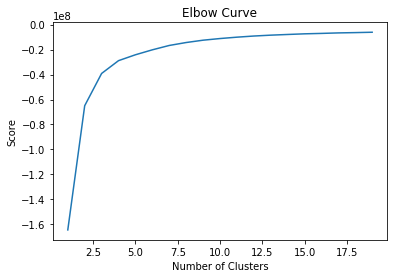

In [63]:
#Memilih jumlah K yang tepat dengan with Elbow Curve

Ks = range(1, 20)
KMNs = [KMeans(n_clusters=i) for i in Ks]
score = [KMNs[i].fit(x).score(x) for i in range(len(KMNs))]
plt.plot(Ks, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

pada Kmeans mengklasifikasikan sampel berdasarkan atribut / fitur ke dalam jumlah K cluster dengan meminimalkan jarak a ntara sampel dan pusat massa sehingga menghasilkan hasil pada plot yang sangat dekat, tetapi Lebih baik untuk data dimensi tinggi. Namun  Kmeans Menganggap cluster sebagai bola, sehingga tidak bekerja secara efisien dengan data berbentuk geometris yang kompleks

hasil plot dari Kmeans, terlihat hasil dari 3 clustering yang menunjukkan data sangat rapat dan dekat, ada juga beberapa cluster yang menyebar jauh di cluster yang sama, sehingga tercampur dengan cluster lainnya dan 46% data tersebut menunjukan sebearan dari Kmeans

karena pada kinerja dari K-Means Clustering ini sendiri tidak sekompetitif teknik-teknik pengelompokan canggih lainnya karena sedikit variasi dalam data dapat menyebabkan varians yang tinggi.


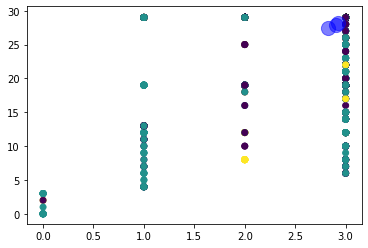

KMeans:  0.46043971733433625


In [64]:
plt.scatter(x.iloc[:, 0], x.iloc[:, 1], c = YPredict)
plt.scatter(KMNClusterCenters[:, 0], KMNClusterCenters[:, 1], c = "b", s=200, alpha=0.5);
plt.show()
print("KMeans: ", silhouette_score(x, YPredict))

Dibawah ini adalah hasil plot dari GMM , terlihat hasil dari kmeans adalah 5% data tersebut menunjukan mixture dari G sebaran peluang Gaussian. jarak antar pusat gerombol dan keragaman setiap gerombol untuk melihat keefektifan metode jika ketiga gerombol saling berjauhan, saling berdekatan, maupun saling tumpang tindih.

Pada hasil saya diatas terdapat menjadi 3 cluster saja

Y Predict :  [0 0 0 ... 1 1 1]


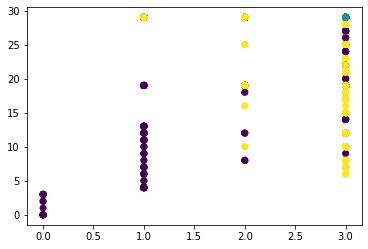

GMM:  -0.05298979703242782


In [65]:
#mengkonfigurasi dan menentukan nilai K sebesar 3 cluster.
GMM = GaussianMixture(n_components=3).fit(x)
YPredict = GMM.predict(x)
print("Y Predict : ", YPredict)

plt.scatter(x.iloc[:,0], x.iloc[:,1],c = YPredict)
plt.show()
print("GMM: ", silhouette_score(x, YPredict))

Pada hasil GMM terdapat 3 cluster dari plot diatas tersebut sudah baik, ada beberapa cluser tersebar tidak terlalu jauh dengan cluster itu sendiri, sehingga penyebarannya tidak mencampur dengan cluster lainnya.. tetapi ada juga yg menyebar lumayan jauh, ukuran clusternya tidak biasa memiliki struktur spesifik seperti halnya oleh K-Means (Circular).

Karena pada dasarnya GMM menggunakan probabilitas sampel untuk menentukan kelayakan milik cluster.Cocok saat digunakan jika tidak tau titik data di mana mereka berada atau kelompok mana.GMM juga Tidak menganggap cluster sebagai geometri apa pun.
